## Problem Statement : 
### 2.	Perceptron algorithm:- Sonar dataset 

Libraies Required

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

Data Set : Sonar dataset


Data Preprocessing

([<matplotlib.patches.Wedge at 0x241b9d34220>,
 [Text(0.12493817499669008, 1.0928817193221307, 'R'),
  Text(-0.12493817499669045, -1.0928817193221307, 'M')],
 [Text(0.06814809545274003, 0.5961173014484349, '46.4%'),
  Text(-0.06814809545274024, -0.5961173014484349, '53.6%')])

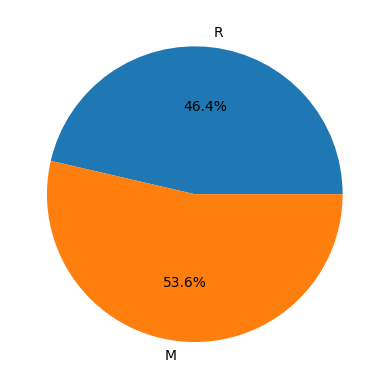

In [36]:
Dataset = '../Data/Sonar/sonar data.csv'
df = pd.read_csv(Dataset)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column
y = np.where(y == 'R', 0, 1)
percentage_r = (y == 0).sum() / len(y) * 100
percentage_m = (y == 1).sum() / len(y) * 100

plt.pie([percentage_r,percentage_m],labels=['R','M'],autopct='%1.1f%%') # Optional


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Neural Network Design (here Perceptron Training )


In [17]:
# Create and train the perceptron model
perceptron_model = Perceptron(max_iter=100, random_state=42)
perceptron_model.fit(X_train, y_train)


Perceptron(max_iter=100, random_state=42)

Metrics 

Accuracy on the test set: 80.95%


<Axes: >

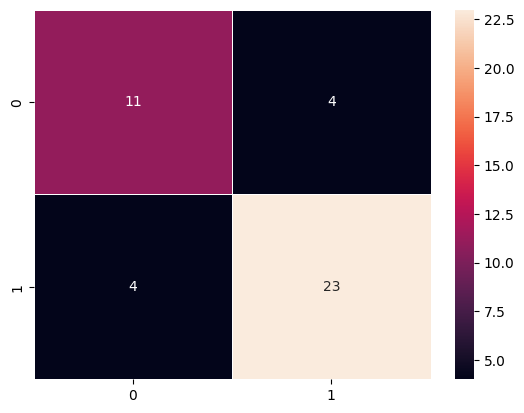

In [26]:
# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,linewidths=0.5,fmt='d')